In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/content/gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [14]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [15]:
x=df.drop('gender',axis=1)
y=df['gender']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
Scalar=StandardScaler()
X_train=Scalar.fit_transform(X_train)
X_test=Scalar.transform(X_test)

In [18]:
SVM_model=SVC(kernel='linear',random_state=0)
SVM_model.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [19]:
y_pred = SVM_model.predict(X_test)

In [20]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9600

Classification Report:
              precision    recall  f1-score   support

      Female       0.96      0.96      0.96       502
        Male       0.96      0.96      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [21]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=le.classes_, index=le.classes_)

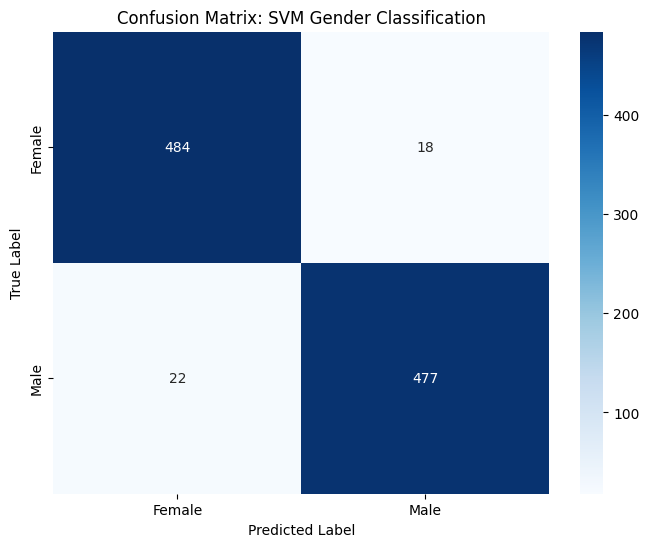

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: SVM Gender Classification')
plt.show()